# CREDIT CARD FRAUD

## Table of Contents


- Introduction
- Understanding the Data
- Exploratory Data Analysis
  - Data Import and Cleaning
  - Statistical Visualization
  - Correlation Matrix
  - Chi-Square Test
  - Segment Analysis 
- Machine Learning 
  - Pre-Processing
  - Assumptions
  - Methodology
  - Model Comparison
- Conclusion 
- Limitations
- Future Improvements

## 1. Introduction

In the age of digital transactions, credit card fraud stands as a pervasive threat, impacting a substantial portion of the population. According to CPA Canada 2023 Fraud Survey, credit card fraud is a widespread issue, impacting 21% of Canadians. The methods employed by fraudsters to access an individual's credit card details are becoming increasingly sophisticated and challenging to evade. This malicious activity takes diverse forms, including phishing emails, website breaches, physical theft of credit card information, and identity theft.

Individuals can enhance their protection by increasing their knowledge and regularly reviewing their banking statements. However, expecting the general public to consistently exhibit such diligence on a large scale may not be feasible. Additionally, relying on credit card holders to monitor their balances and report suspicious charges can be cumbersome.

Statistical models can play a pivotal role in predicting transactions with a high likelihood of being fraudulent. They offer credit providers the potential to intervene and prevent these transactions from being processed. In theory, every credit card transaction should exhibit distinctive characteristics that provide clues regarding its categorization as either legitimate or fraudulent. For a statistical model to be deemed an effective preventive tool, it must effectively identify and analyze these characteristics to make accurate predictions.

## 2. Understanding the Data

The dataset ["Credit card fraud"](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud) is sourced from kaggle. This dataset comprises 1,000,000 credit card transactions, each encompassing 8 columns of information. The characteristics are transaction data and card records with their respective label, whether it was a fraudulent transaction or not. 

**Attribute Information:**

* distance_from_home: The distance from the home where the transaction took place.
* distance_from_last_transaction: The distance from the last transaction made.
* ratio_to_median_purchase_price: Ratio between the purchase price of the transaction and the median purchase price.
* repeat_retailer: Was the transaction repeated at the same retailer?
* used_chip - It is the transaction through chip (credit card).
* used_pin_number: Was the transaction made using the PIN number?
* online_order: Is the transaction an online order?
* Fraud: Is the transaction fraudulent?

## 3. Exploratory Data Analysis

In [15]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing modules for machine learning tasks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
# Importing a specific classifier - K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

import warnings
# Ignoring FutureWarnings to prevent clutter in the output
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
# Reading a CSV file containing card transaction data into a Pandas DataFrame
df = pd.read_csv('C:/Users/Uzma/Desktop/CCF/card_transdata.csv')
# Displaying the first few rows of the DataFrame to inspect the data
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [17]:
# Displaying concise information about the DataFrame, including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### 3.1 Data Cleaning

In [18]:
# Checking for missing values in the DataFrame and summing them up for each column
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [19]:
# Counting the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [20]:
# Counting the occurrences of each unique value in the 'fraud' column
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

### 3.2 Statistical Visualization

In [21]:
# Generating descriptive statistics of the DataFrame, including measures of central tendency, dispersion, and shape of the distribution
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The descriptive statistics provide insights into the features of the dataset:

1. **Distance from Home:**
   - Mean distance_from_home is approximately 26.63, with a wide range (min: 0.005, max: 10632.72).
   - The majority of transactions (75th percentile) have a distance less than 25.74.

2. **Distance from Last Transaction:**
   - The mean distance_from_last_transaction is around 5.04, displaying notable variability (std: 25.84).
   - A significant portion of transactions (75th percentile) has a distance less than 3.36.

3. **Ratio to Median Purchase Price:**
   - The mean ratio_to_median_purchase_price is 1.82, indicating variability with a maximum value of 267.80.
   - The median (50th percentile) is 0.998, suggesting a skewed distribution towards lower values.

4. **Repeat Retailer, Used Chip, Used PIN Number, Online Order:**
   - These binary variables exhibit varying proportions (mean values around 0.88, 0.35, 0.10, and 0.65, respectively).
   - The majority of transactions (75th percentile) have repeat retailer, used_chip, and online_order values of 1.

5. **Fraud:**
   - The target variable 'fraud' is binary, with a mean of 0.087, indicating a relatively low incidence of fraudulent transactions.

Overall, these statistics offer a comprehensive overview of the dataset's central tendencies, variabilities, and the distribution of key features.

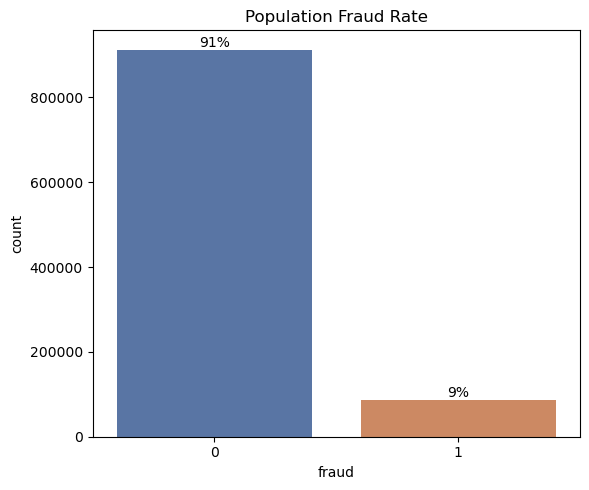

In [22]:
# Creating a count plot to visualize the distribution of the 'fraud' column
fig, ax = plt.subplots(figsize=(6, 5))
# Using Seaborn to plot the count of each unique value in the 'fraud' column
ax = sns.countplot(data=df, x=df['fraud'], ax=ax)

# Adding percentage labels to the bars in the count plot
for c in ax.containers:
    labels=[ f'{x:.0%}' for x in (c.datavalues / df.fraud.count()) ]
    ax.bar_label(c, labels=labels, label_type='edge')
# Setting custom x-axis tick labels    
ax.set_xticklabels(['0', '1'])
# Setting plot title
ax.set_title('Population Fraud Rate')
# Adjusting layout for better visualization
plt.tight_layout()
# Displaying the plot
plt.show()

In [23]:
# Selecting columns with numeric data types
numeric_cols = df.select_dtypes(include='number').columns

# Defining a threshold for the number of unique values to classify columns as discrete or continuous
discrete_threshold = 2
# Extracting discrete columns (columns with a number of unique values less than or equal to the threshold)
discrete_cols = [col for col in df.columns if df[col].nunique() <= discrete_threshold]
# Extracting continuous columns (columns with a number of unique values greater than the threshold)
continuous_cols = [col for col in df.columns if df[col].nunique() > discrete_threshold]
# Displaying the lists of discrete and continuous columns
print(discrete_cols)
print(continuous_cols)

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


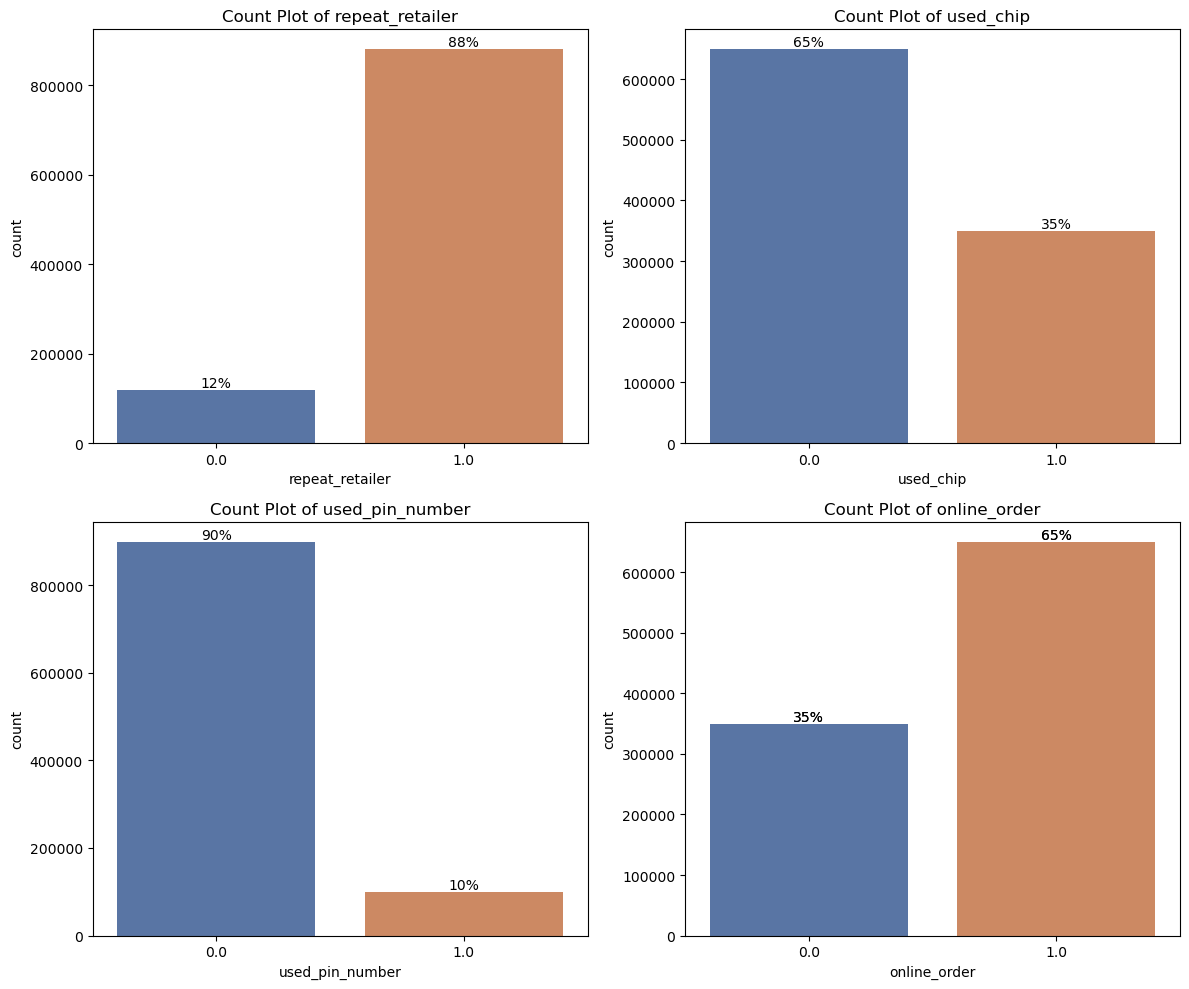

In [24]:
# Creating a figure with subplots to visualize count plots for each discrete column (excluding 'fraud')
plt.figure(figsize=(12, 10))
# Iterating over each discrete column
for i, col in enumerate(discrete_cols, 1):   
    if col != 'fraud':
        # Creating subplots
        plt.subplot(2, 2, i)
        # Using Seaborn to plot count plots for each unique value in the discrete column
        ax = sns.countplot(x=col, data=df)
        # Setting subplot title
        plt.title(f'Count Plot of {col}')
    # Adding percentage labels to the bars in the count plot
    for c in ax.containers:
        labels=[ f'{x:.0%}' for x in (c.datavalues / len(df[col])) ]
        ax.bar_label(c, labels=labels, label_type='edge')
# Adjusting layout for better visualization
plt.tight_layout()
# Displaying the plots
plt.show()

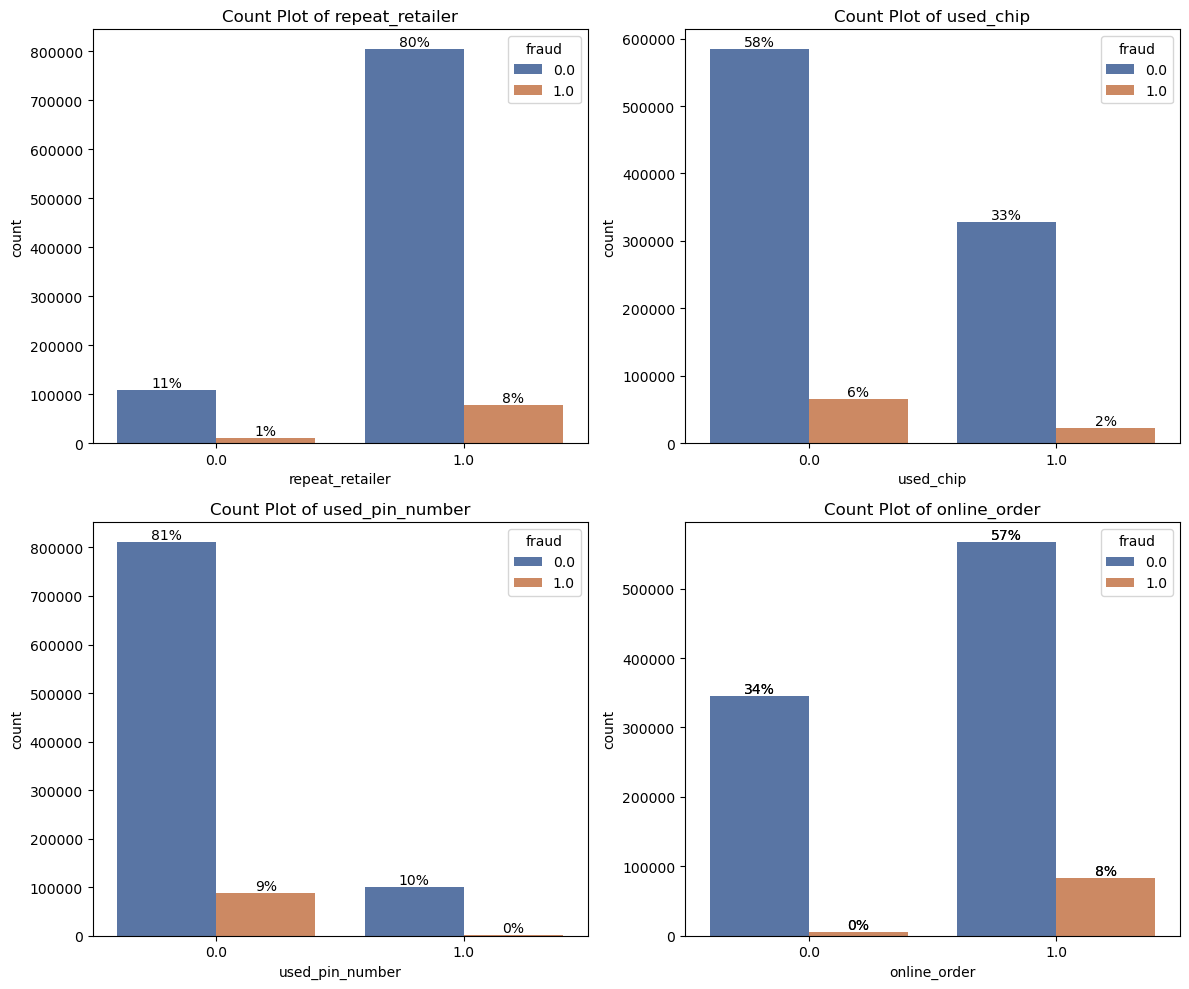

In [25]:
# plot the discrete columns - count plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(discrete_cols, 1):   
    if col != 'fraud':
        plt.subplot(2, 2, i)
        ax = sns.countplot(x=col, hue=df['fraud'], 
                           data=df)
        plt.title(f'Count Plot of {col}')

    for c in ax.containers:
        labels=[ f'{x:.0%}' for x in (c.datavalues / df.fraud.count()) ]
        ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

# Revert back to default warning behavior
warnings.resetwarnings()

1. **All transactions**:  
    -Out of 100 transactions, 9% are identified as fraudulent.
<br>

2. **'repeat_retailer'**:  
    -A vast majority (88%) of transactions are done with repeat retailers, while 12% are done with non-repeat retailers. Among the total fraudulent transactions (9%), 1% are from non-repeat transactions, and 8% are from repeat transactions.
<br>

3. **'used_chip' (credit card)**:  
    -Only 35% of the transactions are done with credit cards (CCs), and 65% use other payment methods. Among the total fraudulent transactions (9%), less than 7% are from transactions without using chips, and only 2% are from transactions with used chips.
<br>

4. **'used_pin_number'**:  
    -Only 10% of transactions involve the use of pin numbers, while 90% are done without. Among the total fraudulent transactions (9%), over 8% are from transactions without using pin numbers, and less than 1% are from transactions using pin numbers.
<br>

5. **'online_order'**:  
    -65% of transactions are online orders, and 35% are non-online orders. Among the total fraudulent transactions (9%), less than 1% are from non-online transactions, and 8% are from online transactions.

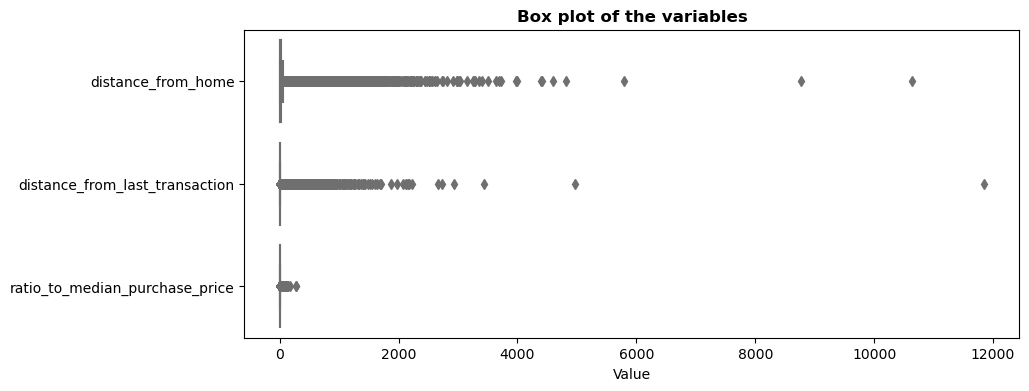

In [26]:

# Creating a box plot to visualize the distribution of variables in the DataFrame
plt.figure(figsize=(10, 4))
# Using Seaborn to plot a horizontal box plot of the variables
sns.boxplot(data=df[continuous_cols], orient="h", color='skyblue')  
# Adding title and axis labels to the plot
plt.title("Box plot of the variables", fontweight='bold')
plt.xlabel("Value")
# Displaying the plot
plt.show()

C:\Users\Uzma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Uzma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Uzma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_ty

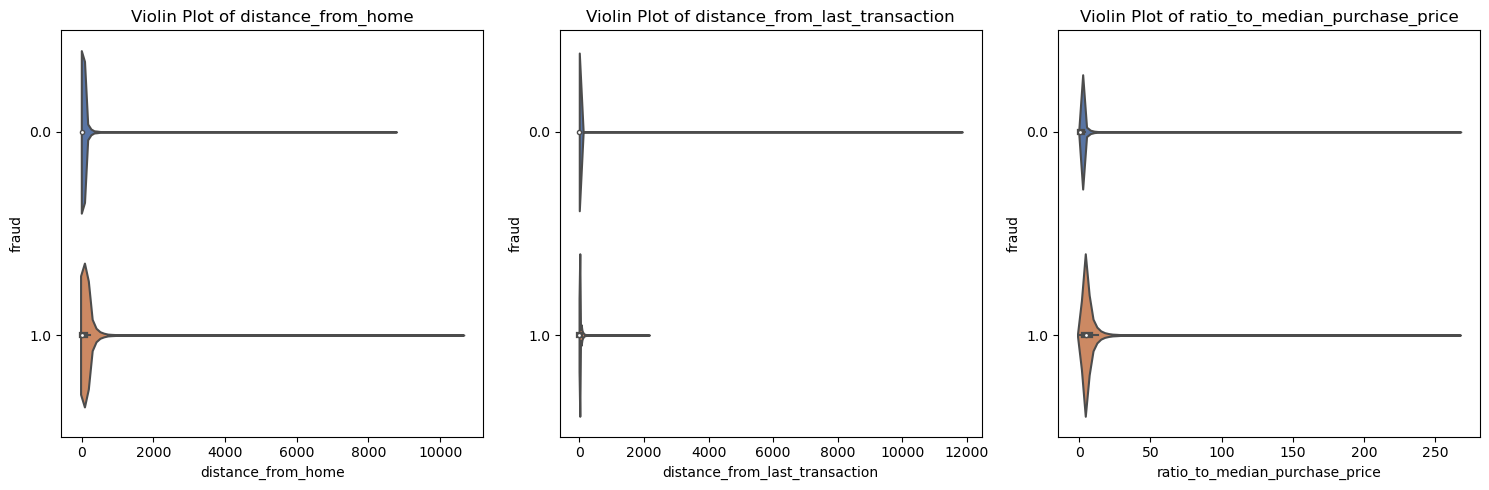

In [27]:
# Creating a figure with subplots to visualize violin plots for each continuous column based on the 'fraud' column
plt.figure(figsize=(15, 5))
# Iterating over each continuous column
for i, col in enumerate(continuous_cols, 1):
    # Creating subplots
    plt.subplot(1, 3, i)
    # Using Seaborn to plot violin plots for the relationship between the continuous column and the 'fraud' column
    sns.violinplot(data=df, x=df[col], 
                   y=df['fraud'].astype('category'))
    # Setting subplot title
    plt.title(f'Violin Plot of {col}')
# Adjusting layout for better visualization
plt.tight_layout()
# Displaying the plots
plt.show()

The plots show the following continuous columns:

'distance_from_home', 'distance_from_last_transaction', & 'ratio_to_median_purchase_price'
seem to have no or little impact on the fraudulent transactions, as they might occur anywhere with any amount of values.

### 3.3 Correlation Matrix

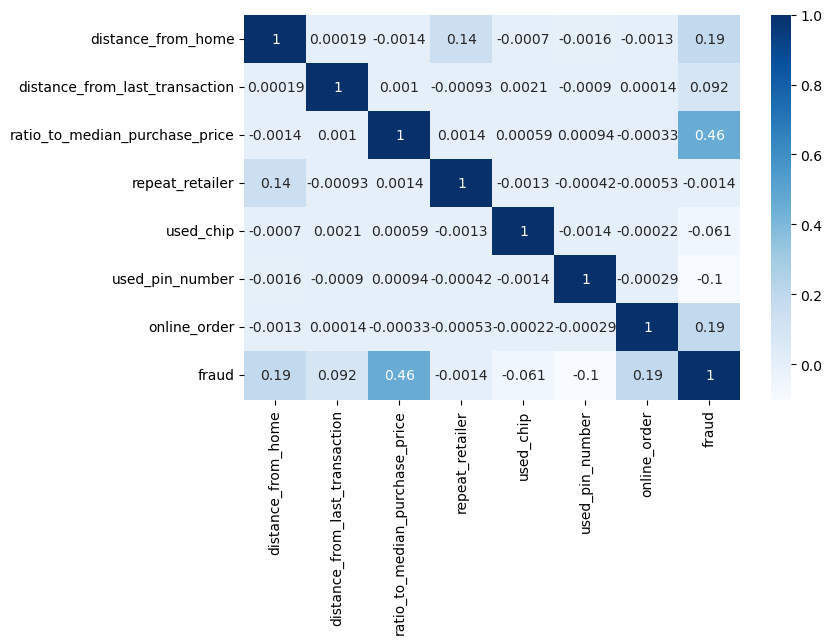

In [28]:
# Creating a figure to visualize a heatmap of the correlation matrix for the DataFrame
plt.figure(figsize=(8, 5))
# Using Seaborn to plot a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='Blues')
# Displaying the plot
plt.show()

In [29]:
# Calculating the correlation between each feature and the 'fraud' target variable and sorting them in descending order
target_corr = df.corr()[['fraud']].sort_values(by='fraud', ascending=False)
# Displaying the correlation values with the 'fraud' target variable
target_corr

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.462305
online_order,0.191973
distance_from_home,0.187571
distance_from_last_transaction,0.091917
repeat_retailer,-0.001357
used_chip,-0.060975
used_pin_number,-0.100293


The correlation coefficients provide information about the linear relationship between pairs of variables. Here's how to interpret the correlations between the "fraud" variable and the other variables:

1. **ratio_to_median_purchase_price (0.462305):**
   - Positive correlation: As the "ratio_to_median_purchase_price" increases, the likelihood of fraud also tends to increase. This suggests that higher ratios to the median purchase price are associated with a higher likelihood of fraud.

<br>

2. **online_order (0.191973):**
   - Positive correlation: The "online_order" variable is positively correlated with fraud. This means that instances where online orders are present are more likely to be associated with fraud.

<br>

3. **distance_from_home (0.187571):**
   - Positive correlation: An increase in "distance_from_home" is associated with a slight increase in the likelihood of fraud. However, the correlation is relatively moderate.

<br>

4. **distance_from_last_transaction (0.091917):**
   - Positive correlation: There is a positive correlation between "distance_from_last_transaction" and fraud. This suggests that instances where the distance from the last transaction is greater are somewhat more likely to be associated with fraud.

<br>

5. **repeat_retailer (-0.001357):**
   - Weak negative correlation: The correlation between "repeat_retailer" and fraud is very close to zero, indicating a weak or negligible relationship. The negative sign suggests a slight tendency for fraud to be less likely in cases involving repeat retailers, but the correlation is minimal.

<br>

6. **used_chip (-0.060975):**
   - Weak negative correlation: The negative correlation between "used_chip" and fraud indicates a weak tendency for fraud to be less likely when a chip is used. However, the correlation is not very strong.

<br>

7. **used_pin_number (-0.100293):**
   - Weak negative correlation: Similarly, the negative correlation with "used_pin_number" suggests a weak tendency for fraud to be less likely when a PIN number is used. The correlation is not very strong.

In summary, the correlation coefficients provide a measure of the strength and direction of the linear relationship between each variable and fraud. Positive correlations indicate that an increase in one variable is associated with an increase in fraud, while negative correlations suggest the opposite. The strength of the correlation is indicated by the magnitude of the coefficient, with values closer to 1 or -1 indicating a stronger relationship. It's important to note that correlation does not imply causation, and other factors may contribute to the observed relationships.

### 3.4 Chi-Square Test

C:\Users\Uzma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


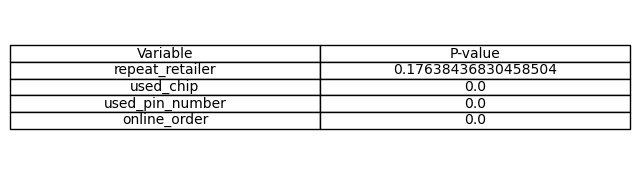

+-----------------+---------------------+
|    Variable     |       P-value       |
+-----------------+---------------------+
| repeat_retailer | 0.17638436830458504 |
|    used_chip    |         0.0         |
| used_pin_number |         0.0         |
|  online_order   |         0.0         |
+-----------------+---------------------+


In [30]:
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Assuming df is your DataFrame
discrete_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Initialize a dictionary to store results
results_dict = {'Variable': [], 'P-value': []}

for var in discrete_cols:
    observed = pd.crosstab(df[var], df['fraud'])
    chi2, p, dof, expected = chi2_contingency(observed)
    results_dict['Variable'].append(var)
    results_dict['P-value'].append(p)

# Create a DataFrame from the results
results_df = pd.DataFrame(results_dict)

# Display the results table using tabulate
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)

# Save the table as a PNG file
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.savefig('chi_square_results.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Display the table in the Jupyter Notebook
print(table)


The chi-squared test is used to determine if there is a significant association between categorical variables. The test involves comparing the observed frequency distribution of a contingency table with the distribution that would be expected if the variables were independent. The p-value in the chi-squared test helps you decide whether to reject the null hypothesis of independence.

Interpretations of the p-values for the chi-squared tests:

1. **Chi-squared test for repeat_retailer (P-value = 0.1764):**
   - P-value greater than the significance level (commonly 0.05): Fail to reject the null hypothesis.
   - Interpretation: There is no significant association between the variables "repeat_retailer" and "fraud." The p-value suggests that any observed association in the data could reasonably occur due to random chance.

2. **Chi-squared test for used_chip (P-value = 0.0):**
   - Very small p-value: Reject the null hypothesis.
   - Interpretation: There is a significant association between the variables "used_chip" and "fraud." The p-value suggests that the observed association is unlikely to occur by random chance, indicating that the two variables are not independent.

3. **Chi-squared test for used_pin_number (P-value = 0.0):**
   - Very small p-value: Reject the null hypothesis.
   - Interpretation: There is a significant association between the variables "used_pin_number" and "fraud." The p-value suggests that the observed association is unlikely to occur by random chance, indicating that the two variables are not independent.

4. **Chi-squared test for online_order (P-value = 0.0):**
   - Very small p-value: Reject the null hypothesis.
   - Interpretation: There is a significant association between the variables "online_order" and "fraud." The p-value suggests that the observed association is unlikely to occur by random chance, indicating that the two variables are not independent.

In summary, a small p-value (typically less than 0.05) indicates evidence to reject the null hypothesis of independence, suggesting a significant association between the categorical variables. Conversely, a larger p-value suggests that the observed association could reasonably occur by random chance, and you would fail to reject the null hypothesis.

### 3.5 Segment Analysis - Mean Value by Class

In [31]:
# Calculating the overall mean for each feature (excluding 'fraud') and creating a DataFrame
overall_mean = df.drop(columns='fraud').mean().to_frame().T
# Selecting discrete columns (excluding 'fraud') for further analysis
discrete_cols_excl_fraud = [col for col in discrete_cols if col != 'fraud']
# Calculating the mean for continuous and selected discrete columns, grouped by the 'fraud' column
segment_mean = df.groupby('fraud')[continuous_cols + discrete_cols_excl_fraud].mean()

# Concatenating the overall mean and segment mean DataFrames
df_means = pd.concat([overall_mean, segment_mean], axis=0).reset_index(drop=True)
# Renaming the index for better readability
df_means = df_means.rename(index={0: 'Overall', 1: '0', 2: '1'})
# Displaying the DataFrame with mean values
df_means

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
Overall,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552
0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


The mean values provided represent the average values for each variable (feature) in the dataset, separated by the target variable "fraud" (0 for non-fraudulent transactions and 1 for fraudulent transactions). Here's the interpretation:

1. **distance_from_home:**
   - *Overall Mean:* 26.63
   - *Non-Fraudulent (0):* 22.83
   - *Fraudulent (1):* 66.26
   - *Interpretation:* On average, the distance from home is higher for fraudulent transactions (66.26) compared to non-fraudulent transactions (22.83).

<br>

2. **distance_from_last_transaction:**
   - *Overall Mean:* 5.04
   - *Non-Fraudulent (0):* 4.30
   - *Fraudulent (1):* 12.71
   - *Interpretation:* The average distance from the last transaction is higher for fraudulent transactions (12.71) compared to non-fraudulent transactions (4.30).

<br>

3. **ratio_to_median_purchase_price:**
   - *Overall Mean:* 1.82
   - *Non-Fraudulent (0):* 1.42
   - *Fraudulent (1):* 6.01
   - *Interpretation:* The average ratio to the median purchase price is higher for fraudulent transactions (6.01) compared to non-fraudulent transactions (1.42).

<br>

4. **repeat_retailer:**
   - *Overall Mean:* 0.88
   - *Non-Fraudulent (0):* 0.88
   - *Fraudulent (1):* 0.88
   - *Interpretation:* The mean value for "repeat_retailer" is approximately the same for both non-fraudulent and fraudulent transactions.

<br>

5. **used_chip:**
   - *Overall Mean:* 0.35
   - *Non-Fraudulent (0):* 0.36
   - *Fraudulent (1):* 0.26
   - *Interpretation:* The average usage of a chip is slightly lower for fraudulent transactions (0.26) compared to non-fraudulent transactions (0.36).

<br>

6. **used_pin_number:**
   - *Overall Mean:* 0.10
   - *Non-Fraudulent (0):* 0.11
   - *Fraudulent (1):* 0.00
   - *Interpretation:* The mean value for "used_pin_number" is substantially lower for fraudulent transactions (0.00) compared to non-fraudulent transactions (0.11).

<br>

7. **online_order:**
   - *Overall Mean:* 0.65
   - *Non-Fraudulent (0):* 0.62
   - *Fraudulent (1):* 0.95
   - *Interpretation:* The average occurrence of online orders is higher for fraudulent transactions (0.95) compared to non-fraudulent transactions (0.62).

These mean values provide insights into the average behavior of the features for both non-fraudulent and fraudulent transactions, helping to identify potential patterns or differences between the two classes.

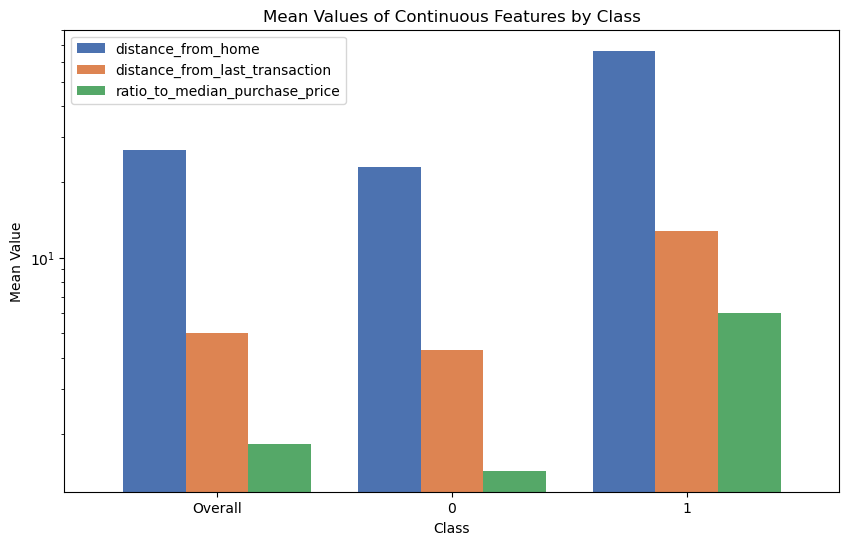

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the continuous variables
continuous_cols2 = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
df_continuous_means2 = df_means[continuous_cols2]

# Setting Seaborn color palette to "deep"
sns.set_palette("deep")

# Setting the default figure size
plt.rcParams['figure.figsize'] = (10, 6)  # Adjust the figure size as needed

# Creating a bar plot to visualize the mean values of continuous features by class (fraud and non-fraud)
df_continuous_means2.plot(kind='bar', logy=True, width=0.8)

# Adding title and axis labels to the plot
plt.title('Mean Values of Continuous Features by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)

# Displaying the plot
plt.show()


Another way to explore continuous variables is using logarithmic scale. The purpose of using a logarithmic scale is to better visualize data that spans several orders of magnitude. When data varies widely in scale, a logarithmic scale can compress the visual representation, making it easier to observe details in smaller values. The bar plot above reveals that fraudulent transactions exhibit higher values for distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price. 

In [69]:
# Defining a function to calculate the upper limit based on the interquartile range (IQR) for a given variable in the DataFrame
def value_iqr(df, variable):
      q1 = round(df[variable].quantile(q = 0.25),2)
      q3 = round(df[variable].quantile(q = 0.75), 2)
      IQR = q3 - q1
      # Calculating the upper limit as Q3 + 3 * IQR
      upper_limit = round(q3 + 3 * IQR , 2)      
      return upper_limit
# Calculating upper limits for specific variables in the DataFrame
upper_limit_distance_from_home = value_iqr(df, "distance_from_home")
upper_limit_distance_from_last_transaction = value_iqr(df, "distance_from_last_transaction")
upper_limit_ratio_to_median_purchase_price = value_iqr(df, "ratio_to_median_purchase_price")

C:\Users\Uzma\AppData\Local\Temp\ipykernel_16148\4162235733.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Uzma\AppData\Local\Temp\ipykernel_16148\4162235733.py:25: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
C:\Users\Uzma\AppData\Local\Temp\ipykernel_16148\4162235733.py:33: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0]

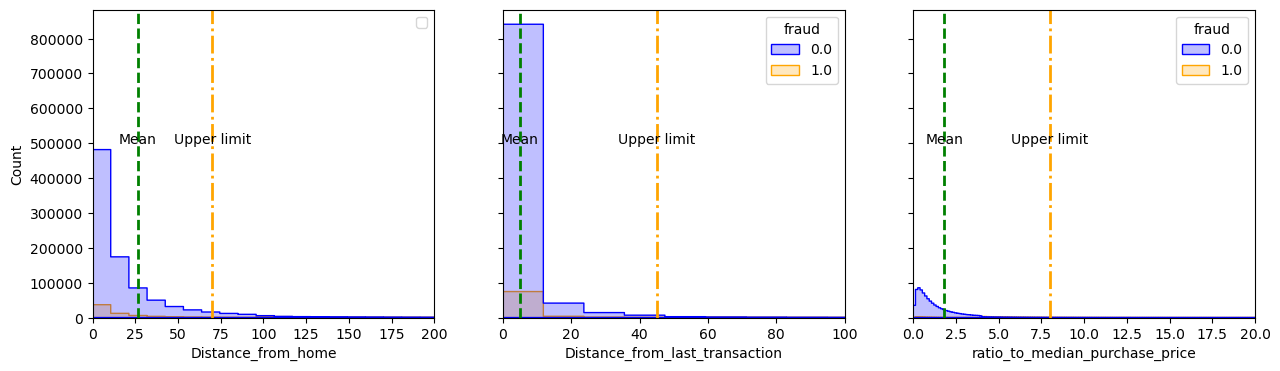

In [70]:

# Setting custom colors for the plots
colors = ['blue', 'orange', 'green']

# Setting upper limits for specific variables
upper_limit_distance_from_home = 70
upper_limit_distance_from_last_transaction = 45
upper_limit_ratio_to_median_purchase_price = 8
# Creating subplots for each variable with histograms, means, and upper limits
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# Plotting the histogram for 'distance_from_home'
sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
ax[0].set_xlim(0, 200)
ax[0].axvline(np.mean(df["distance_from_home"]), linewidth=2, color=colors[2], linestyle='--')
ax[0].axvline(upper_limit_distance_from_home, linewidth=2, color=colors[1], linestyle='-.')
ax[0].annotate("Mean", (np.mean(df["distance_from_home"]), 500000), ha='center')
ax[0].annotate("Upper limit", (70, 500000), ha='center')
ax[0].set_xlabel("Distance_from_home")
ax[0].set_ylabel("Count")
ax[0].legend()
# Plotting the histogram for 'distance_from_last_transaction'
sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
ax[1].set_xlabel("Distance_from_last_transaction")
ax[1].set_xlim(0, 100)
ax[1].axvline(np.mean(df["distance_from_last_transaction"]), linewidth=2, color=colors[2], linestyle='--')
ax[1].annotate("Mean", (np.mean(df["distance_from_last_transaction"]), 500000), ha='center')
ax[1].axvline(upper_limit_distance_from_last_transaction, linewidth=2, color=colors[1], linestyle='-.')
ax[1].annotate("Upper limit", (45, 500000), ha='center')
# Plotting the histogram for 'ratio_to_median_purchase_price'
sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0], hue="fraud", ax=ax[2], element="step", palette=colors)
ax[2].set_xlabel("ratio_to_median_purchase_price")
ax[2].set_xlim(0, 20)
ax[2].axvline(np.mean(df["ratio_to_median_purchase_price"]), linewidth=2, color=colors[2], linestyle='--')
ax[2].annotate("Mean", (np.mean(df["ratio_to_median_purchase_price"]), 500000), ha='center')
ax[2].axvline(upper_limit_ratio_to_median_purchase_price, linewidth=2, color=colors[1], linestyle='-.')
ax[2].annotate("Upper limit", (8, 500000), ha='center')
# Adjusting layout for better visualization
plt.subplots_adjust(wspace=0.2)
# Displaying the plot
plt.show()

The largest number of records for the distance_from_home variable are found within a distance of less than 100 miles.<br>
The largest number of records for the Distance_from_last_transaction variable are within a distance of less than 50 miles.<br>
A similar distribution is observed between fraud and ratio_to_median_purchase_price labels where ratio to median purchase price is concentrated around 1.0.<br>

## 4. Machine Learning

**4.1 Pre-Processing**

1. **Data Balancing**:<br>
The original imbalanced dataset was adjusted to achieve a balanced distribution of fraudulent and non-fraudulent transactions. 


2. **Data Scaling**:<br>
The dataset was also scaled. Scaling data ensures that the values in each column fall within a consistent range when compared to other columns. Proper data scaling is essential for facilitating the learning and identification of patterns by various statistical models. To further refine the dataset, three additional columns were scaled using a robust scaler.


3. **Data Flattening**:<br>
The final step in data preparation involved data flattening. Flattening the target variable arrays is often done to ensure compatibility with machine learning algorithms that expect the target variable to be one-dimensional. Some algorithms may expect the target variable to be a simple array rather than a column vector or a multi-dimensional array. Therefore, flattening helps ensure consistent and proper input for training and testing machine learning models.

**4.2 Assumptions** In order to leverage the provided data for making meaningful predictions, certain assumptions must be considered:

<br>

1. **Discernible Patterns in Fraudulent Transactions:**
- *Assumption:* Fraudulent credit card transactions exhibit discernible patterns.
- *Explanation:* This assumption posits that fraudulent transactions are not random but rather follow certain patterns that can be identified through statistical modeling. It implies that there are features or characteristics common to fraudulent transactions, allowing a predictive model to learn and recognize these patterns.


2. **Efficacy of PCA Methodology:**
- *Assumption:* The efficacy of the model depends on the Principal Component Analysis (PCA) methodology maintaining the informational integrity of the original dataset.
- *Explanation:* The data provided has undergone dimensionality reduction through PCA, a technique used to reduce the number of features while preserving the most important information. This assumption suggests that for the model to perform well, the reduced dataset created by PCA must still capture the essential information related to fraudulent transactions. If too much critical information is lost during dimension reduction, the model may struggle to accurately predict fraud or provide meaningful insights when applied to new data not seen during training.

In summary, these assumptions highlight the need for meaningful patterns in fraudulent transactions and emphasize the importance of the PCA methodology accurately preserving the information essential for fraud prediction. If fraudulent transactions have distinguishable patterns and if PCA effectively captures the relevant information, the model has a better chance of producing reliable predictions and insights. These assumptions guide the expectations and considerations when using the model for predicting credit card fraud based on the provided dataset.

**4.3 Methodology** Six models were developed using the balanced dataset and evaluated against the original data. These models include:
1. Logistic Regression
2. Naive_Bayes
3. KN_Classifier
4. Decision Tree
5. Random Forest
6. XGBoost

Each model was trained on the data and assessed for its predictive performance on the test data. The comparison of these models was based on two evaluation criteria:
1. Accuracy
2. Precision
3. Recall(Sensitivity)
4. F1 score

In [71]:
# Importing Counter for counting class distribution and train_test_split for splitting the data
from collections import Counter
from sklearn.model_selection import train_test_split
# Importing RandomOverSampler for handling class imbalance using random oversampling
from imblearn.over_sampling import RandomOverSampler
# Importing various scalers for preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [72]:
# Separating features (X) and target variable (y)
X = df.drop('fraud', axis=1)
y = df['fraud']
# Displaying the shapes of the feature and target variable arrays
print(X.shape)
print(y.shape)

(1000000, 7)
(1000000,)


In [73]:
# Displaying the class distribution of the original dataset using Counter
print('Original dataset shape %s' % Counter(y))

# Initializing and applying RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
# Displaying the class distribution of the resampled dataset using Counter
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 912597, 1.0: 87403})
Resampled dataset shape Counter({0.0: 912597, 1.0: 912597})


In [74]:
# Converting y_res to a NumPy array and reshaping it
y_res = y_res.to_numpy()
y_res = y_res.reshape(-1, 1)

# Concatenating the resampled features (X_res) and reshaped target variable (y_res) horizontally
data = np.hstack((X_res, y_res))
# Displaying the shape of the concatenated array
data.shape

(1825194, 8)

In [81]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# Initializing RobustScaler for preprocessing continuous features
scaler = RobustScaler()

# Scaling the continuous features in the training set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
# Scaling the continuous features in the testing set using the same scaler
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols] )


# Flattening the target variable arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
# Displaying the shapes of the training and testing sets
print('X training shape = ',X_train.shape)
print('Y training shape = ', y_train.shape)
print('X test shape     = ',X_test.shape)
print('Y test shape     = ',y_test.shape)

X training shape =  (1460155, 7)
Y training shape =  (1460155,)
X test shape     =  (365039, 7)
Y test shape     =  (365039,)


### Model Building Using Machine Learning Algorithms

In [82]:
# Importing various classifiers from scikit-learn and XGBoost
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importing metrics for model evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Importing modules for cross-validation and hyperparameter tuning
from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [91]:
# Importing seaborn for visualizing confusion matrices
import seaborn as sns

# Defining a function to train and evaluate different classification models
def get_model(X_train, y_train, X_test, y_test, model_type):
    # Selecting the appropriate model based on the input
    if model_type == 'logistic_regression':
        model = LogisticRegression()
    elif model_type == 'naive_bayes':
        model = GaussianNB()
    elif model_type == 'kn_classifier':
        model = KNeighborsClassifier()
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_type == 'random_forest':
        model = RandomForestClassifier()
    elif model_type == 'xg_boost':
        model = xgb.XGBClassifier()
    else:
        raise ValueError('Invalid model type')
    
    # Training the model on the training set
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy scores
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = model.score(X_train, y_train)

    # Displaying accuracy scores
    print(f'Test Accuracy for {model_type}: {acc_test:.3f}')
    print(f'Train Accuracy for {model_type}: {acc_train:.3f}')
    print()

    # Displaying confusion matrix using seaborn with modified size and font size
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 12})
    plt.title(f'Confusion Matrix for {model_type}')
    plt.show()
    print()

    # Displaying classification report
    print(f'Classification Report for {model_type}:\n', classification_report(y_test, y_pred))

    # Performing cross-validation and displaying results
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross Validation scores:\n', cv_scores)
    print(f'Mean Score of {cv_scores.mean():.2f} with a standard deviation of {cv_scores.std():.2f}')
    
    return model, acc_test, acc_train


Model - logistic_regression: 

Test Accuracy for logistic_regression: 0.941
Train Accuracy for logistic_regression: 0.941



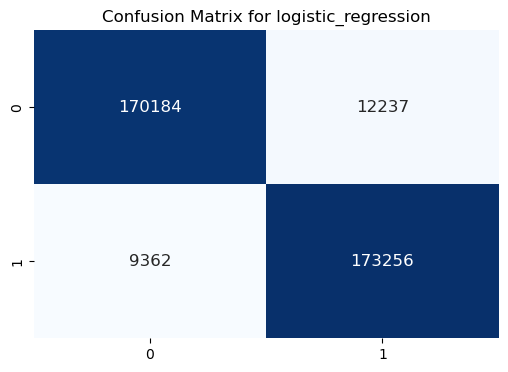


Classification Report for logistic_regression:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182421
         1.0       0.93      0.95      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039

Cross Validation scores:
 [0.94126651 0.94144457 0.94062617 0.94142403 0.94110557]
Mean Score of 0.94 with a standard deviation of 0.00
----------------------------------

Model - naive_bayes: 

Test Accuracy for naive_bayes: 0.937
Train Accuracy for naive_bayes: 0.937



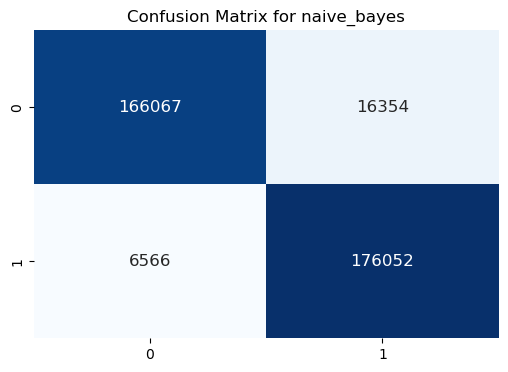


Classification Report for naive_bayes:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.94    182421
         1.0       0.92      0.96      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039

Cross Validation scores:
 [0.93695875 0.93691081 0.935613   0.93752376 0.9367122 ]
Mean Score of 0.94 with a standard deviation of 0.00
----------------------------------

Model - kn_classifier: 

Test Accuracy for kn_classifier: 0.997
Train Accuracy for kn_classifier: 0.998



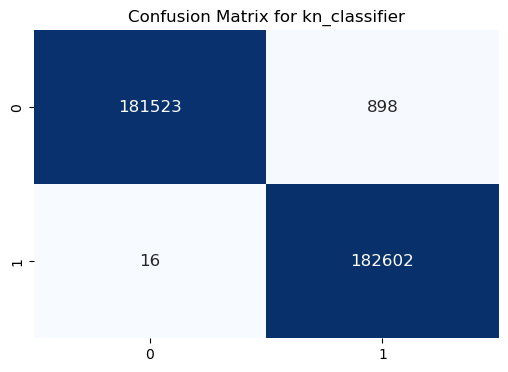


Classification Report for kn_classifier:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

Cross Validation scores:
 [0.99718523 0.99741466 0.99714414 0.99721947 0.99705853]
Mean Score of 1.00 with a standard deviation of 0.00
----------------------------------

Model - decision_tree: 

Test Accuracy for decision_tree: 1.000
Train Accuracy for decision_tree: 1.000



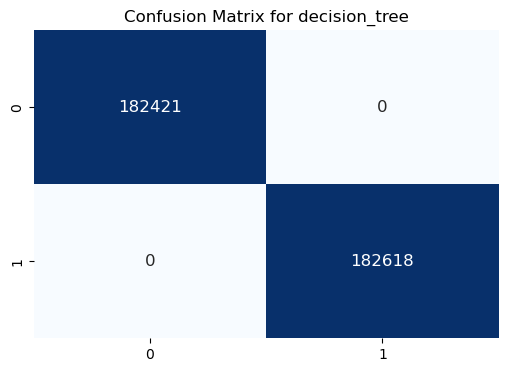


Classification Report for decision_tree:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

Cross Validation scores:
 [1.         0.99999315 0.99999658 0.99999658 1.        ]
Mean Score of 1.00 with a standard deviation of 0.00
----------------------------------

Model - random_forest: 

Test Accuracy for random_forest: 1.000
Train Accuracy for random_forest: 1.000



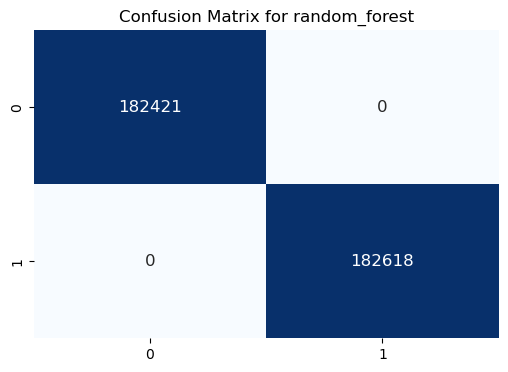


Classification Report for random_forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

Cross Validation scores:
 [1.         0.99999315 1.         1.         1.        ]
Mean Score of 1.00 with a standard deviation of 0.00
----------------------------------

Model - xg_boost: 

Test Accuracy for xg_boost: 0.999
Train Accuracy for xg_boost: 0.999



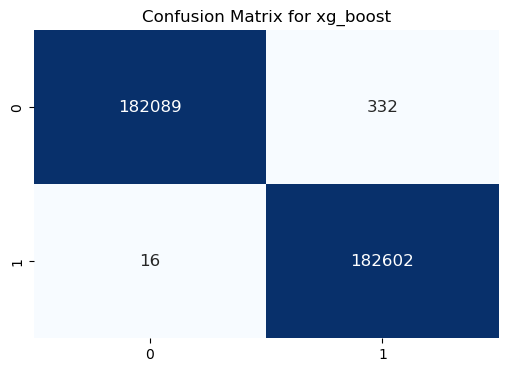


Classification Report for xg_boost:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

Cross Validation scores:
 [0.99896586 0.99895901 0.9990138  0.99895901 0.99883916]
Mean Score of 1.00 with a standard deviation of 0.00
----------------------------------



In [92]:
# Defining a list of model types to iterate through
model_types = ['logistic_regression', 'naive_bayes', 'kn_classifier', 'decision_tree', 
               'random_forest', 'xg_boost']
# Initializing a dictionary to store the results
results = {'Model': [],
           'Test Accuracy': [],
           'Train Accuracy': []}
# Iterating through each model type
for model_type in model_types:
    print(f'Model - {model_type}: ')
    print()
    # Training and evaluating the model using the defined function
    model, acc_test, acc_train = get_model(X_train, y_train, X_test, y_test, model_type)
    # Adding the results to the dictionary
    results['Model'].append(model_type.capitalize())
    results['Test Accuracy'].append(acc_test)
    results['Train Accuracy'].append(acc_train)
    print('----------------------------------')
    print()
    
# Displaying the results in a tabular format
#results_df = pd.DataFrame(results)
#results_df

## 4.4 Model Comparison

In [86]:
# Creating a DataFrame from the results dictionary and sorting by Test Accuracy in descending order
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
# Displaying the sorted results DataFrame
print(results_df)

                 Model  Test Accuracy  Train Accuracy
3        Decision_tree       1.000000        1.000000
4        Random_forest       1.000000        1.000000
5             Xg_boost       0.999047        0.999264
2        Kn_classifier       0.997496        0.998368
0  Logistic_regression       0.940831        0.941149
1          Naive_bayes       0.937212        0.936733


## 5. Conclusion

All the models have displayed good performance. The Decison Tree and Random Forest algorithms, in particular, achieved outstanding results with a perfect accuracy of 1.0 for the training data, and for the test data with F1-score of 1.0. XGBoost and KN_Classifier Algorithm delivered an accuracy of 0.99 and F1-score of 1.0. The Logistic Regression yielded an accuracy of 0.94 and F1-score of 0.94. Among all the models used on the balanced data, naive_bayes exhibited the lowest accuracy of 0.93 with an F1-Score of 0.94.

This information suggests that for the balanced data, Decison Tree and Random Forest algorithms stand out as the most effective model for predicting fraudulent activities in credit card transactions.

However, the choice of the best model should also consider practical factors, such as the availability of infrastructure, resources, and computational power required to run the model. Models like Random Forest and XGBoost demand substantial computational resources, leading to increased deployment costs. In contrast, simpler models such as logistic regression are more resource-efficient and cost-effective. If the potential financial impact is significant, it may justify the use of a more complex model, despite the higher costs associated with its deployment.

For banks dealing with smaller average transaction values, a high precision is desirable to minimize labeling non-fraudulent transactions as fraudulent. Verification through customer contact can be employed for flagged transactions, but low precision increases the workload and costs associated with this human element.

Conversely, for banks with higher transaction values, a low recall indicates that it may fail to detect transactions labeled as non-fraudulent, potentially resulting in substantial losses if a high-value fraudulent transaction goes undetected. In such cases, a focus on high recall is crucial to identify actual fraudulent transactions effectively.


## 6. Limitations

Although the model was trained using a sizable dataset, it constitutes only a tiny portion of the data volume it would confront in a real-world application. It's conceivable that there could be distinctive data characteristics within the training dataset originating from its specific source.

## 7. Future Improvements

To prepare the models for practical deployment, it's crucial to subject them to testing on more extensive and diverse datasets. If their performance diminishes when exposed to a broader range of data, it necessitates the establishment of an ongoing monitoring and improvement process characterized by frequent evaluation cycles.

It's also important to acknowledge that there are several alternative models and techniques for tackling classification problems, which have not been covered in this report. These alternatives encompass:

- Convolutional Neural Networks
- Recurrent Neural Networks
- ANN
- Support Vector Machines
- The application of MCMC techniques to other algorithms

Subsequent efforts can involve experimenting with these alternative techniques and conducting comparative assessments to gain deeper insights into their performance.